<a href="https://colab.research.google.com/github/AdamAnderB/AOW_practice/blob/main/virtual_hddm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install virtualenv
!virtualenv venv
!source venv/bin/activate

created virtual environment CPython3.10.12.final.0-64 in 794ms
  creator CPython3Posix(dest=/content/venv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.3.1, setuptools==69.0.2, wheel==0.42.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [5]:
!pip install pymc==5.6.0
!pip install ssm-simulators==0.3.1
!pip install huggingface-hub>=0.16.4
!pip install blackjax
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.7/450.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 53.6 MB/s eta 0:00:00
  Attempting uninstall: pytensor
    Found existing installation: pytensor 2.14.2
    Uninstalling pytensor-2.14.2:
      Successfully uninstalled pytensor-2.14.2
  Attempting uninstall: pymc
    Found existing installation: pymc 5.7.2
    Uninstalling pymc-5.7.2:
      Successfully uninstalled pymc-5.7.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.3/459.3 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ssm-simulators: filename=ssm_simulators-0.3.1-cp310-cp310-linux_x86_64.whl size=1403564 sha256=b91be31f3562b9f1c1b3630dc08446e0c1dab1be75a48c37dca3a1c5c28547db
  Stored in directory: /root/.cache/pip/wheels/f2/ed/6e/0aaf191dd0c30871e123ddc8bef98b2eb3d6

In [6]:
!pip install numpy==1.23.4
!pip install git+https://github.com/lnccbrown/hssm@main
!pip install git+https://github.com/brown-ccv/hddm-wfpt@main
!pip install numpyro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 43.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow 2.14.0 requires numpy>=1.23.5, but you have numpy 1.23.4 which is incompatible.


  Cloning https://github.com/lnccbrown/hssm (to revision main) to /tmp/pip-req-build-60yofrn8
  Running command git clone --filter=blob:none --quiet https://github.com/lnccbrown/hssm /tmp/pip-req-build-60yofrn8
  Resolved https://github.com/lnccbrown/hssm to commit de4898497b26f1ddcba99e9c41e3415ff30d360a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.6/304.6 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 84.4 MB/s e

In [15]:
from ssms.basic_simulators import simulator
import numpy as np
import pandas as pd


In [7]:


# Specify parameters
v_true, a_true, z_true, t_true = [0.5, 1.5, 0.5, 0.2]


# Simulate data
sim_out = simulator.simulator(
    theta=[v_true, a_true, z_true, t_true],  # parameter list
    model="ddm",  # specify model (many are included in ssms)
    n_samples=500,  # number of samples for each set of parameters
)

# Turn into nice dataset
# Turn data into a pandas dataframe
dataset = pd.DataFrame(
    np.column_stack([sim_out["rts"][:, 0], sim_out["choices"][:, 0]]),
    columns=["rt", "response"],
)

dataset

,rt,response
0,0.870880,1.0
1,5.524448,1.0
2,1.890024,1.0
3,2.556637,1.0
4,2.527982,1.0
...,...,...
495,1.423076,1.0
496,1.504509,1.0
497,5.902301,1.0
498,2.960860,1.0


In [8]:
# a changes trial wise
a_true_trialwise = np.random.normal(loc=2, scale=0.3, size=1000)
theta_mat = np.zeros((1000, 4))
theta_mat[:, 0] = v_true
theta_mat[:, 1] = a_true_trialwise
theta_mat[:, 2] = z_true
theta_mat[:, 3] = t_true

# simulate data
sim_out_trialwise = simulator.simulator(
    theta=theta_mat,  # parameter_matrix
    model="ddm",  # specify model (many are included in ssms)
    n_samples=1,  # number of samples for each set of parameters
)

# Turn into nice dataset
dataset_trialwise = pd.DataFrame(
    np.column_stack(
        [sim_out_trialwise["rts"][:, 0], sim_out_trialwise["choices"][:, 0]]
    ),
    columns=["rt", "response"],
)

dataset_trialwise

,rt,response
0,1.247817,1.0
1,2.480698,1.0
2,2.258366,1.0
3,2.120873,1.0
4,1.483525,1.0
...,...,...
995,9.183940,1.0
996,2.550847,-1.0
997,1.807710,1.0
998,1.972077,1.0


In [21]:
# Basics
import os
import sys
import time
import jax

from matplotlib import pyplot as plt
import arviz as az  # Visualization
import pytensor  # Graph-based tensor library
import hssm

# import ssms.basic_simulators # Model simulators
import hddm_wfpt
import bambi as bmb

# Setting float precision in pytensor
pytensor.config.floatX = "float32"

from jax.config import config

jax.config.update("jax_enable_x64", False)

<ipython-input-21-06c0374b5d73>:19: DeprecationWarning: Accessing jax.config via the jax.config submodule is deprecated.
  from jax.config import config


In [22]:
# Specify parameter values
v_true, a_true, z_true, t_true = [0.5, 1.5, 0.5, 0.2]

# Simulate data
sim_out = simulator.simulator([v_true, a_true, z_true, t_true], model="ddm", n_samples=500)

# Turn data into a pandas dataframe
dataset = pd.DataFrame(
    np.column_stack([sim_out["rts"][:, 0], sim_out["choices"][:, 0]]),
    columns=["rt", "response"],
)

dataset

,rt,response
0,1.010178,1.0
1,2.516855,1.0
2,1.250933,1.0
3,1.186437,1.0
4,1.297735,1.0
...,...,...
495,0.522246,1.0
496,1.651146,1.0
497,1.986994,1.0
498,1.172726,1.0


In [11]:
simple_ddm_model = hssm.HSSM(data=dataset)

In [23]:
print(simple_ddm_model)

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: analytical
Observations: 500

Parameters:

v:
    Prior: Normal(mu: 0.0, sigma: 2.0)
    Explicit bounds: (-inf, inf)
a:
    Prior: HalfNormal(sigma: 2.0)
    Explicit bounds: (0.0, inf)
z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)
t:
    Prior: HalfNormal(sigma: 2.0, initval: 0.10000000149011612)
    Explicit bounds: (0.0, inf)

Lapse probability: 0.05
Lapse distribution: Uniform(lower: 0.0, upper: 10.0)


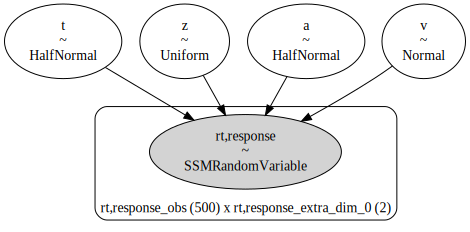

In [24]:
simple_ddm_model.graph()

In [36]:
pip install --upgrade --force-reinstall scipy

  Using cached scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
  Using cached numpy-1.26.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.4
    Uninstalling numpy-1.23.4:
      Successfully uninstalled numpy-1.23.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.2 which is incompatible.
hssm 0.

In [37]:
infer_data_simple_ddm_model = simple_ddm_model.sample(
    sampler="nuts_numpyro",  # type of sampler to choose, 'nuts_numpyro', 'nuts_blackjax' of default pymc nuts sampler
    cores=1,  # how many cores to use
    chains=2,  # how many chains to run
    draws=500,  # number of draws from the markov chain
    tune=500,  # number of burn-in samples
    idata_kwargs=dict(log_likelihood=True),  # return log likelihood
)  # mp_ctx="forkserver")

/usr/local/lib/python3.10/dist-packages/jax/_src/numpy/array_methods.py:733: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/jax/_src/numpy/array_methods.py:733: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)


In [38]:
type(infer_data_simple_ddm_model)

arviz.data.inference_data.InferenceData

In [39]:
infer_data_simple_ddm_model

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [40]:
az.summary(infer_data_simple_ddm_model)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
v,0.607,0.049,0.519,0.699,0.002,0.002,540.0,670.0,1.0
z,0.477,0.018,0.442,0.510,0.001,0.001,508.0,760.0,1.0
t,0.208,0.031,0.143,0.259,0.001,0.001,469.0,552.0,1.0
a,1.511,0.042,1.443,1.602,0.002,0.001,517.0,526.0,1.0


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:134: UserWarning: Items starting with ~: ['log_likelihood'] have not been found and will be ignored
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


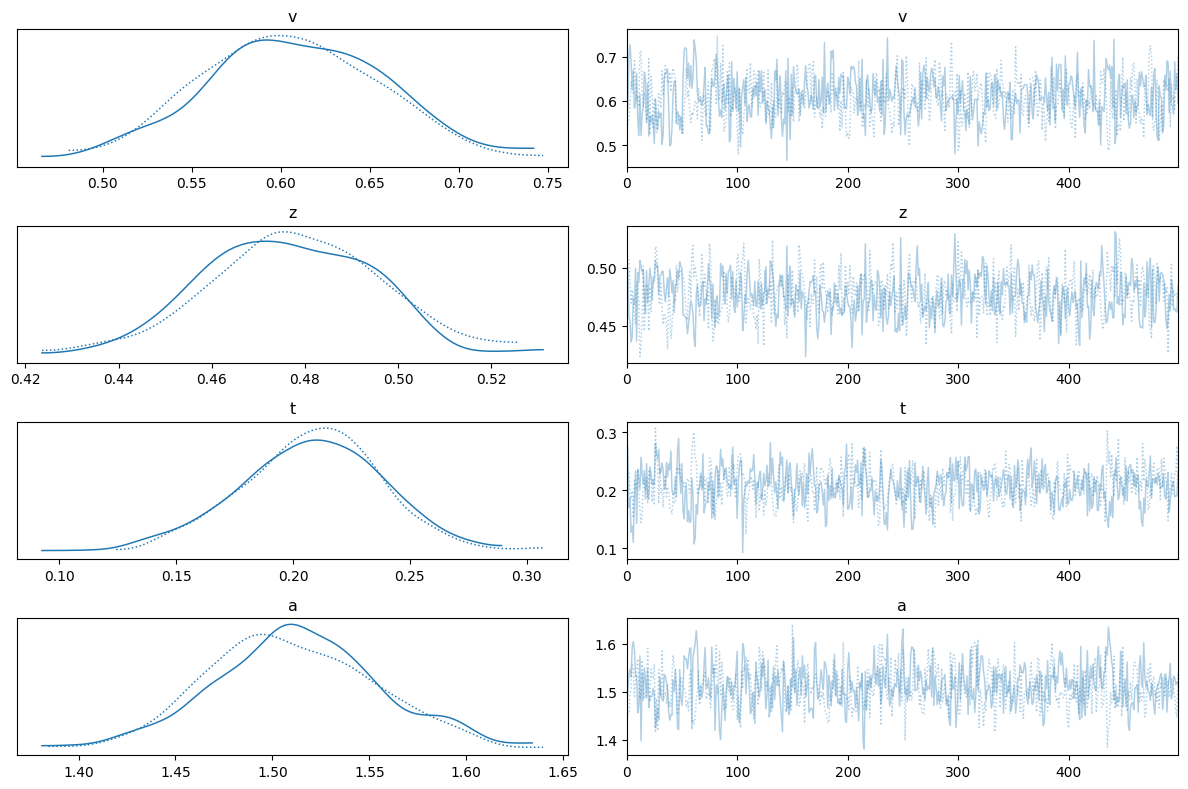

In [41]:
az.plot_trace(
    infer_data_simple_ddm_model,
    var_names="~log_likelihood",  # we exclude the log_likelihood traces here
)
plt.tight_layout()

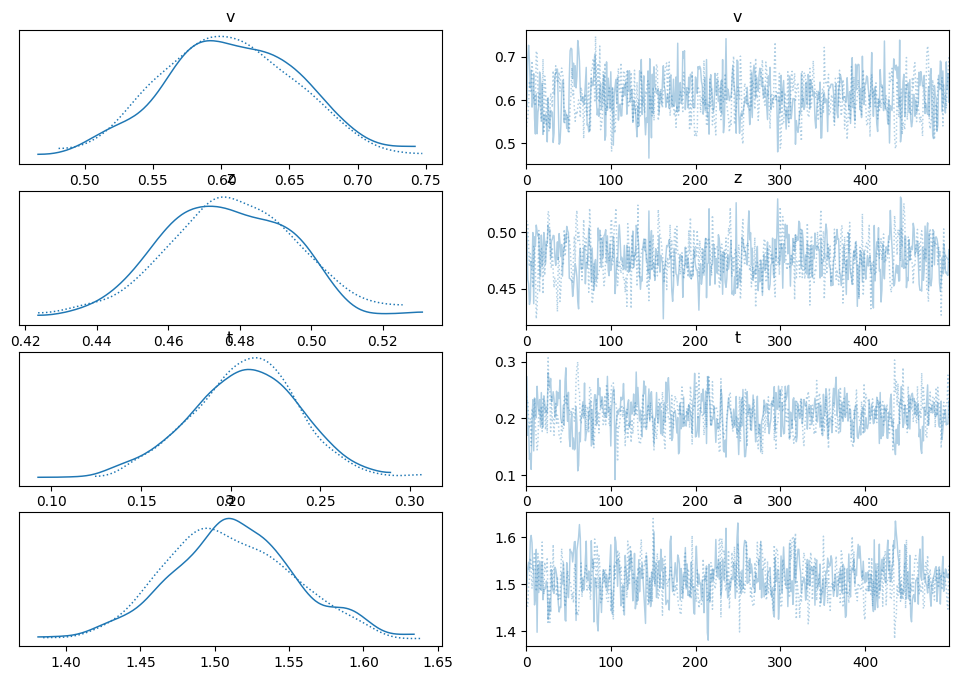

In [42]:
az.plot_trace(simple_ddm_model.traces);

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

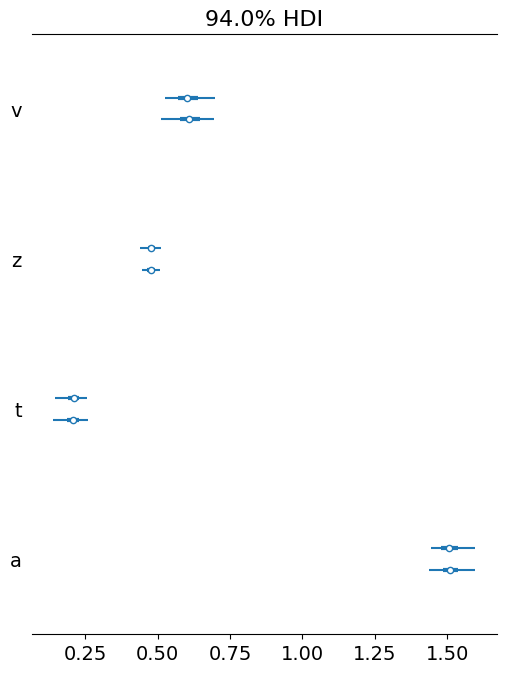

In [43]:
az.plot_forest(simple_ddm_model.traces)

array([<Axes: title={'center': 'v'}>, <Axes: title={'center': 'z'}>,
       <Axes: title={'center': 't'}>, <Axes: title={'center': 'a'}>],
      dtype=object)

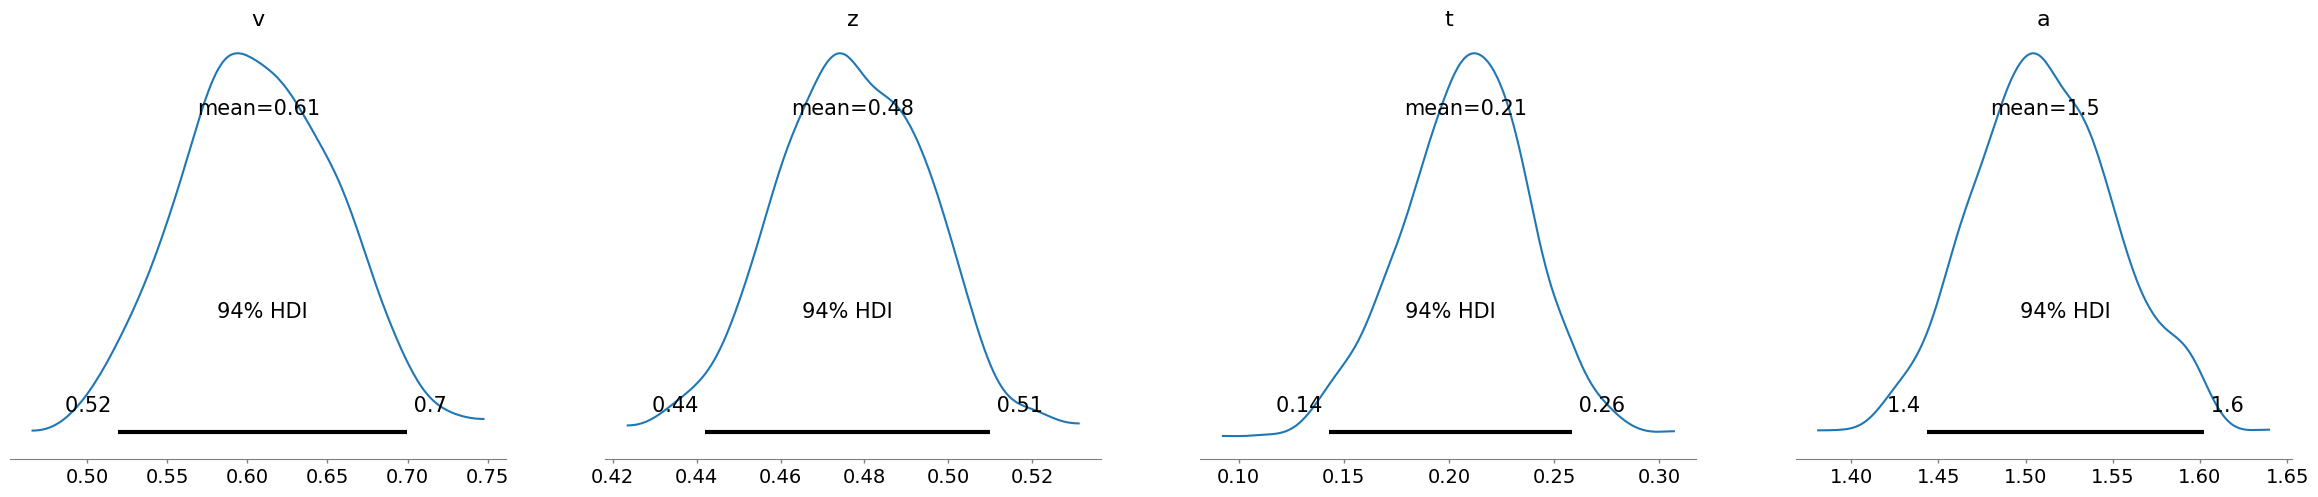

In [44]:
az.plot_posterior(simple_ddm_model.traces)

array([[<Axes: ylabel='z'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='t'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='v', ylabel='a'>, <Axes: xlabel='z'>,
        <Axes: xlabel='t'>]], dtype=object)

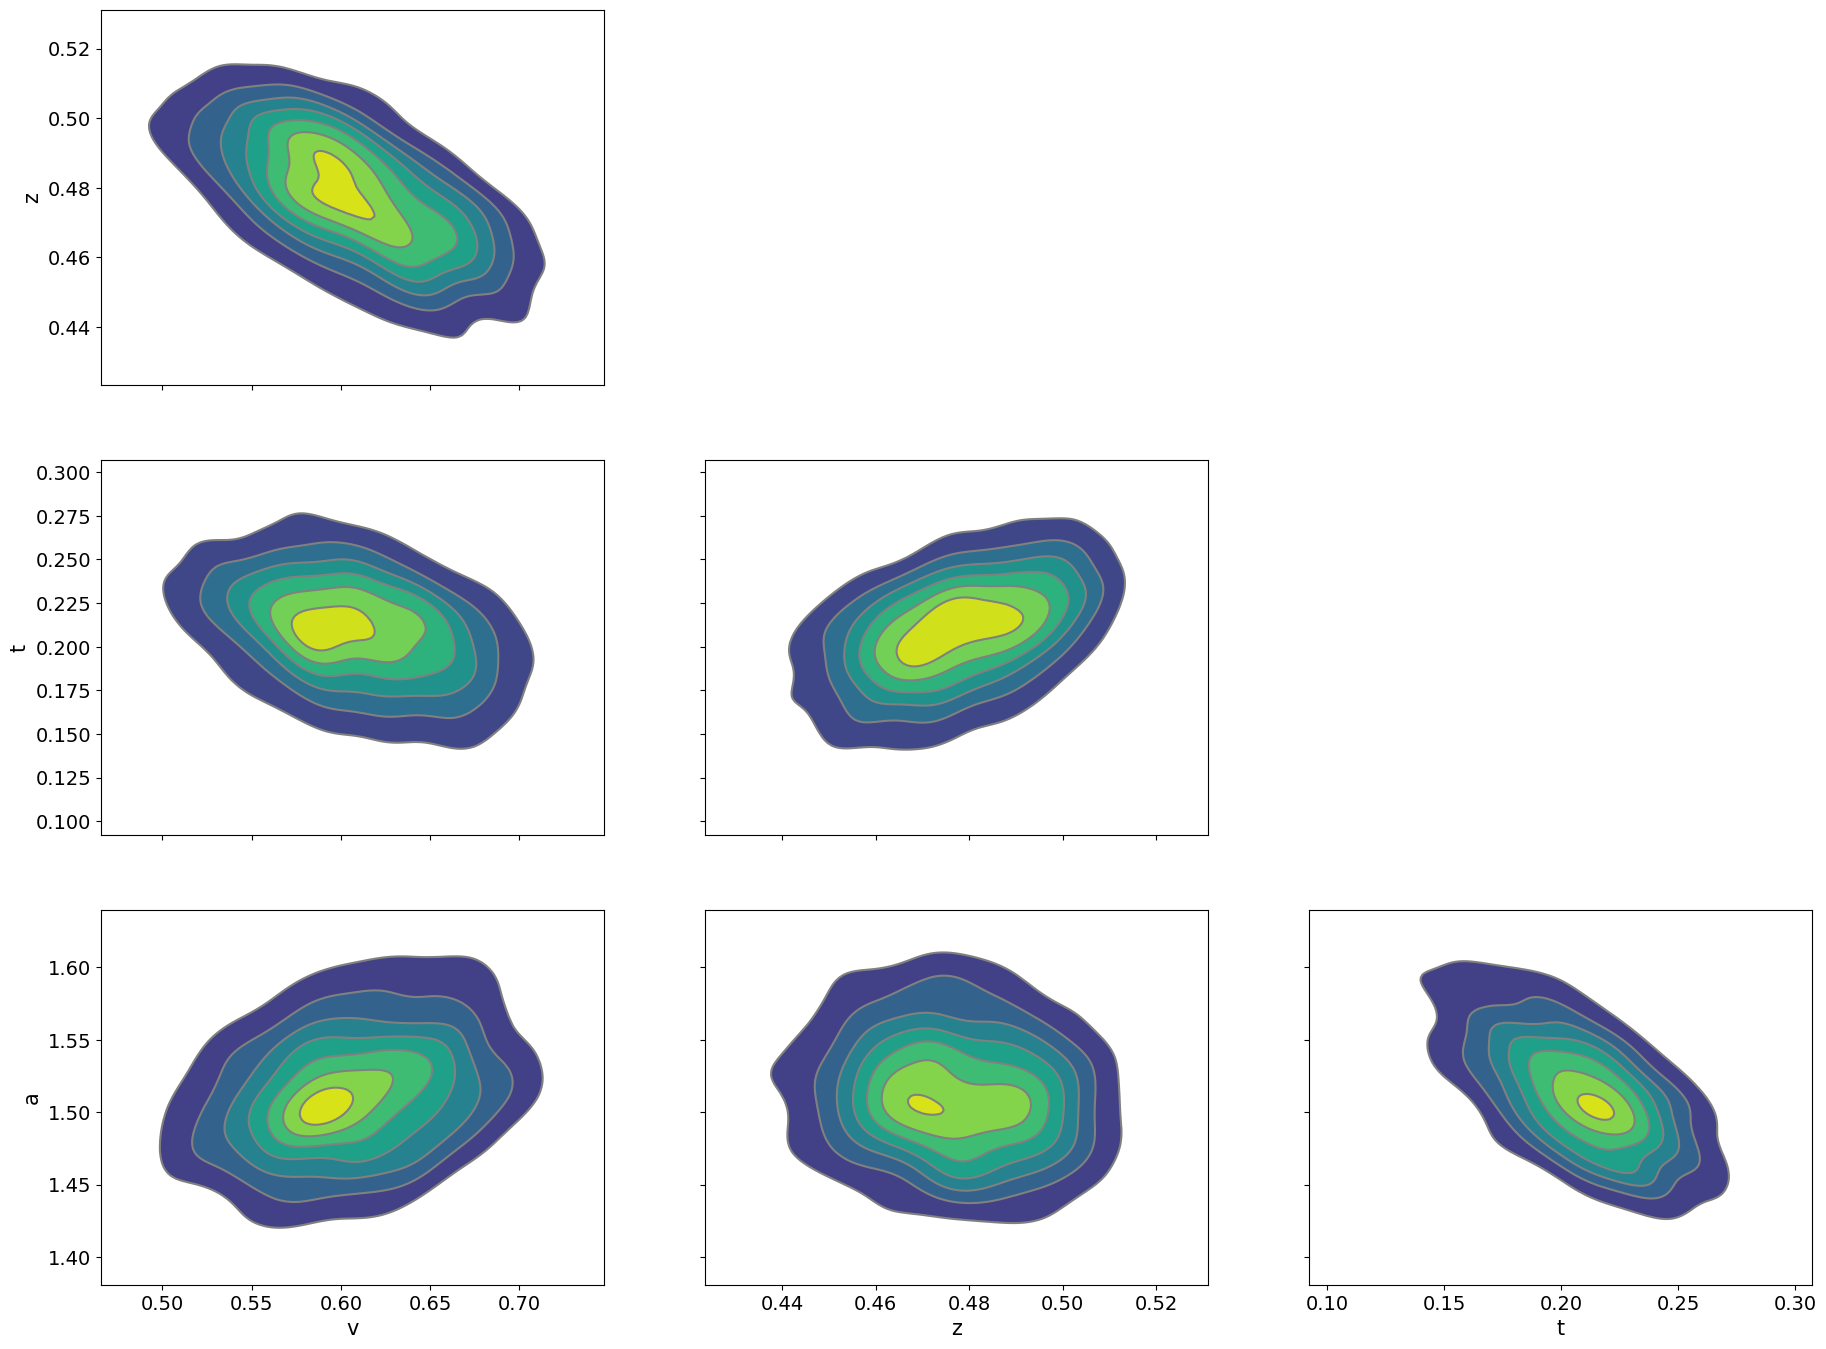

In [45]:
az.plot_pair(simple_ddm_model.traces, kind="kde")

In [47]:
simple_ddm_model.loglik_kind

'analytical'

In [49]:
# Simulate angle data
v_true, a_true, z_true, t_true, theta_true = [0.5, 1.5, 0.5, 0.5, 0.2]
obs_angle = simulator.simulator(
    [v_true, a_true, z_true, t_true, theta_true], model="angle", n_samples=1000
)

dataset_angle = pd.DataFrame(
    np.column_stack([obs_angle["rts"][:, 0], obs_angle["choices"][:, 0]]),
    columns=["rt", "response"],
)

In [50]:
model_angle = hssm.HSSM(data=dataset_angle, model="angle")

model_angle

Hierarchical Sequential Sampling Model
Model: angle

Response variable: rt,response
Likelihood: approx_differentiable
Observations: 1000

Parameters:

v:
    Prior: Uniform(lower: -3.0, upper: 3.0)
    Explicit bounds: (-3.0, 3.0)
a:
    Prior: Uniform(lower: 0.30000001192092896, upper: 3.0)
    Explicit bounds: (0.3, 3.0)
z:
    Prior: Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)
    Explicit bounds: (0.1, 0.9)
t:
    Prior: Uniform(lower: 0.0010000000474974513, upper: 2.0)
    Explicit bounds: (0.001, 2.0)
theta:
    Prior: Uniform(lower: -0.10000000149011612, upper: 1.2999999523162842)
    Explicit bounds: (-0.1, 1.3)

Lapse probability: 0.05
Lapse distribution: Uniform(lower: 0.0, upper: 10.0)

In [51]:
model_angle.loglik_kind

'approx_differentiable'

In [52]:
from jax.config import config

config.update("jax_enable_x64", False)
infer_data_angle = model_angle.sample(
    sampler="nuts_numpyro",
    chains=2,
    cores=2,
    draws=500,
    tune=500,
    idata_kwargs=dict(log_likelihood=False),  # no need to return likelihoods here
)

<ipython-input-52-97eb5063b2f4>:1: DeprecationWarning: Accessing jax.config via the jax.config submodule is deprecated.
  from jax.config import config
/usr/local/lib/python3.10/dist-packages/jax/_src/numpy/array_methods.py:733: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

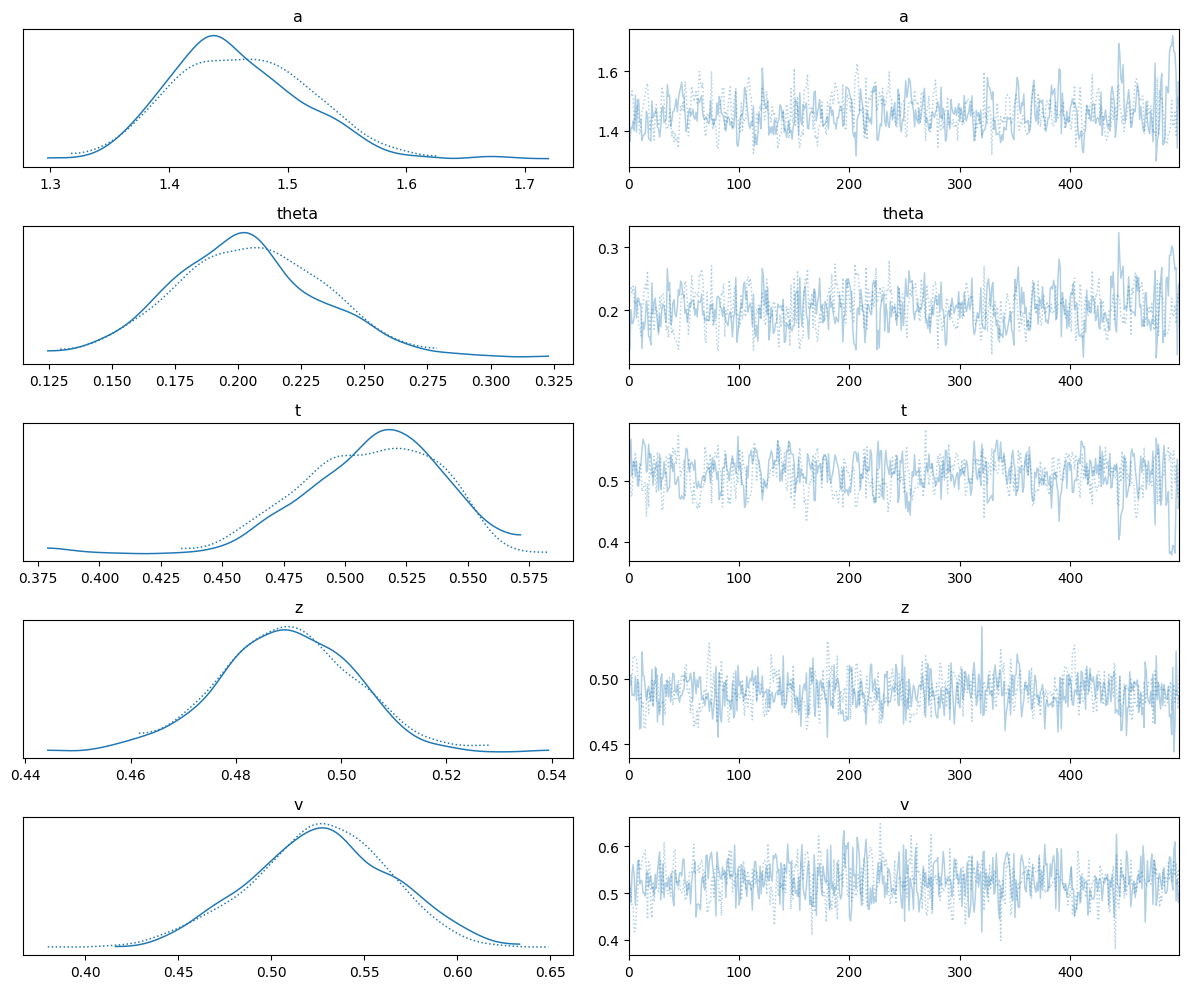

In [53]:
az.plot_trace(model_angle.traces)
plt.tight_layout()

In [54]:
ddm_model_only_v = hssm.HSSM(data=dataset, model="ddm", a=1.5, t=0.2, z=0.5)


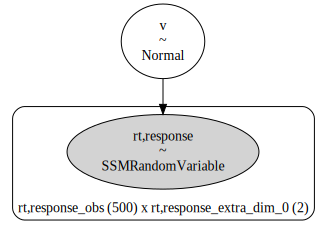

In [55]:
ddm_model_only_v.graph()


In [56]:
ddm_model_only_v.sample(
    sampler="nuts_numpyro",
    chains=2,
    cores=2,
    draws=500,
    tune=500,
    idata_kwargs=dict(log_likelihood=False),  # no need to return likelihoods here
)

/usr/local/lib/python3.10/dist-packages/jax/_src/numpy/array_methods.py:733: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [ ]:
az.plot_trace(ddm_model_only_v.traces)

In [58]:
# Make some hierarchical data

n_subjects = 15  # number of subjects
n_trials = 200  # number of trials per subject

sd_v = 0.5  # sd for v-intercept
mean_v = 0.5  # mean for v-intercept

data_list = []
for i in range(n_subjects):
    # Make parameters for subject i
    intercept = np.random.normal(mean_v, sd_v, size=1)
    x = np.random.uniform(-1, 1, size=n_trials)
    y = np.random.uniform(-1, 1, size=n_trials)
    v = intercept + (0.8 * x) + (0.3 * y)

    true_values = np.column_stack(
        [v, np.repeat([[1.5, 0.5, 0.5, 0.0]], axis=0, repeats=n_trials)]
    )

    # Simulate data
    obs_ddm_reg_v = simulator.simulator(true_values, model="ddm", n_samples=1)

    # Append simulated data to list
    data_list.append(
        pd.DataFrame(
            {
                "rt": obs_ddm_reg_v["rts"].flatten(),
                "response": obs_ddm_reg_v["choices"].flatten(),
                "x": x,
                "y": y,
                "subject": i,
            }
        )
    )

# Make single dataframe out of subject-wise datasets
dataset_reg_v_hier = pd.concat(data_list)
dataset_reg_v_hier

,rt,response,x,y,subject
0,3.773069,1,0.693649,-0.096573,0
1,1.288600,-1,-0.236071,-0.008546,0
2,1.383367,-1,-0.152705,-0.503037,0
3,1.938472,1,0.429978,0.090702,0
4,1.752442,-1,-0.202994,-0.811636,0
...,...,...,...,...,...
195,1.639015,1,0.060530,0.470216,14
196,1.040798,1,-0.867860,0.380332,14
197,1.005326,-1,-0.975939,-0.952763,14
198,1.007619,-1,-0.868042,-0.221278,14


In [ ]:
from google.colab import files

uploaded = files.upload()

In [59]:
model_reg_v_angle_hier = hssm.HSSM(
    data=dataset_reg_v_hier,
    model="angle",
    include=[
        {
            "name": "v",
            "prior": {
                "Intercept": {
                    "name": "Uniform",
                    "lower": -3.0,
                    "upper": 3.0,
                    "initval": 0.0,
                },
                "x": {"name": "Uniform", "lower": -1.0, "upper": 1.0, "initval": 0.0},
                "y": {"name": "Uniform", "lower": -1.0, "upper": 1.0, "initval": 0.0},
            },
            "formula": "v ~ 1 + (1|subject) + x + y",
            "link": "identity",
        }
    ],
)

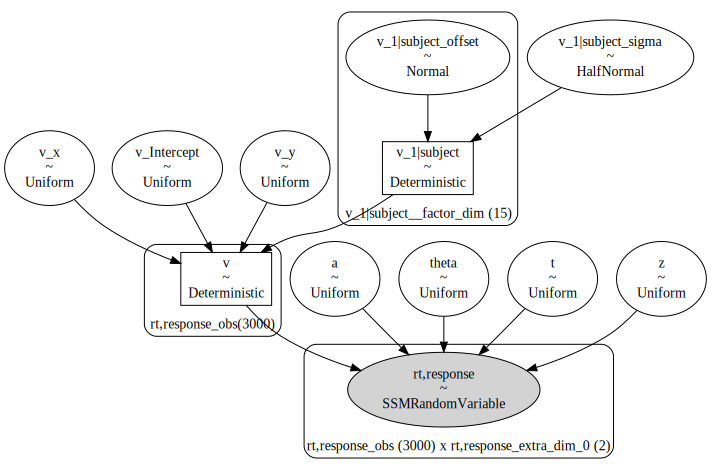

In [60]:
model_reg_v_angle_hier.graph()

In [61]:
from jax.config import config

config.update("jax_enable_x64", False)
model_reg_v_angle_hier.sample(
    sampler="nuts_numpyro", chains=2, cores=1, draws=1000, tune=1000
)

<ipython-input-61-41b693afd9f1>:1: DeprecationWarning: Accessing jax.config via the jax.config submodule is deprecated.
  from jax.config import config
/usr/local/lib/python3.10/dist-packages/jax/_src/numpy/array_methods.py:733: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

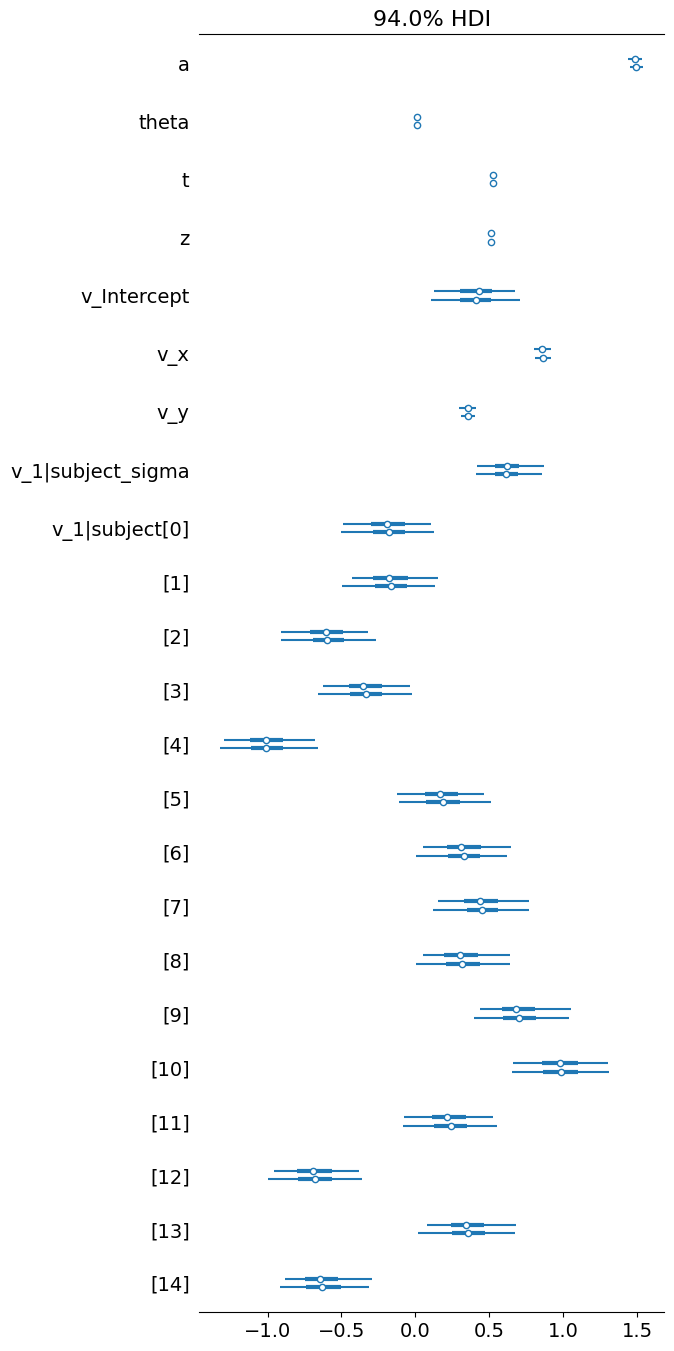

In [62]:
az.plot_forest(model_reg_v_angle_hier.traces)
